## Homework_3_Rachel_Cao MFE-preprogram-python

There is a csv under the data folder called 'hw3.csv'


### The goal of this hw is to calculate volumeUSD by chain

Since each notebook is its own isolated environment, the package libraries must be imported at the beginning of the notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from functools import reduce
import math

%matplotlib inline

## Import the csv file and investigate this file

In [2]:
df = pd.read_csv('data/hw3.csv')

Check the table size, info, and description.

Check the individual columns for unique sets of info and np.isfinite(set) and pd.isnull(set)

In [3]:
df.size

24003

In [4]:
df.info

<bound method DataFrame.info of                        ts       open       high        low      close  \
0     2021-12-02 14:00:00    22.4150    22.4913    22.0816    22.3516   
1     2021-12-02 23:00:00     4.8043     4.8043     4.7426     4.7806   
2     2021-12-10 15:00:00   182.4900        NaN   175.2100   175.8600   
3     2021-12-10 18:00:00  3978.4300  3989.7400  3932.0000  3972.3400   
4     2021-12-08 21:00:00   193.3240   194.2420   192.5640   193.1540   
...                   ...        ...        ...        ...        ...   
2662  2021-12-03 12:00:00   243.5040   244.4700   243.0960   243.7920   
2663  2021-12-03 07:00:00   231.1080        NaN   231.1080   234.5980   
2664  2021-12-10 23:00:00     3.4600     3.4800     3.4100     3.4200   
2665  2021-12-03 23:00:00  4215.0000  4249.7200  4183.2300  4198.8300   
2666  2021-12-06 07:00:00     1.0012     1.0012     1.0011     1.0011   

            volume  volumeUSD token chain  
0     3.150215e+04        NaN   UNI   ETH  
1  

In [5]:
df.describe()

,open,high,low,close,volume,volumeUSD
count,2667.000000,2163.000000,2378.000000,2.531000e+03,2.667000e+03,0.0
mean,7064.250761,7009.354391,6963.685381,2.307774e+04,4.794219e+05,NaN
std,16866.246913,16878.982545,16683.896987,2.813898e+05,1.651197e+06,NaN
min,1.000200,1.000400,1.000200,1.000500e-02,6.717800e+01,NaN
25%,5.396500,5.052950,5.226625,5.341300e+00,1.324246e+03,NaN
50%,190.387000,192.373000,187.646000,1.900500e+02,1.886909e+04,NaN
75%,284.045000,284.160000,282.607500,1.706660e+03,1.059882e+05,NaN
max,58664.400000,58783.160000,58445.530000,5.688883e+06,3.282850e+07,NaN


Verify that the input tokens and chains have uniform spelling

In [6]:
df['token'].unique()
df['chain'].unique()
df['token'].value_counts()

BTC                                   323
COMP                                  322
CRV                                   318
SOL                                   318
USDT                                  314
UNI                                   312
AAVE                                  312
ETH                                   298
<span name="tokenName">UNI</span>      30
<span name="tokenName">ETH</span>      28
<span name="tokenName">USDT</span>     19
<span name="tokenName">CRV</span>      17
<span name="tokenName">SOL</span>      16
<span name="tokenName">AAVE</span>     16
<span name="tokenName">BTC</span>      14
<span name="tokenName">COMP</span>     10
Name: token, dtype: int64

Find the null and nan values

In [7]:
pd.isnull(df['high']).sum()

504

In [8]:
pd.isnull(df['low']).sum()
pd.isnull(df['close']).sum()
pd.isnull(df).sum(axis=1)

0       1
1       1
2       2
3       1
4       1
       ..
2662    1
2663    2
2664    1
2665    1
2666    1
Length: 2667, dtype: int64

In [9]:
np.isfinite(df['open']).sum()
np.isfinite(df['high']).sum()
np.isfinite(df['close']).sum()

2531

In [10]:
pd.isnull(df['volumeUSD']).sum()

2667

This shows that the entire volumeUSD column is empty and that there are 504 null entries in the high column, 289 null in the low column, 150 null in the token column, 136 in close.

It also confirms that there aren't any typos in the name entries for chain, but that there are 'span' tags in the token column.

In [11]:
df.set_index('ts')

,open,high,low,close,volume,volumeUSD,token,chain
ts,,,,,,,,
2021-12-02 14:00:00,22.4150,22.4913,22.0816,22.3516,3.150215e+04,NaN,UNI,ETH
2021-12-02 23:00:00,4.8043,4.8043,4.7426,4.7806,7.368623e+04,NaN,CRV,ETH
2021-12-10 15:00:00,182.4900,NaN,175.2100,175.8600,7.373675e+04,NaN,SOL,SOL
2021-12-10 18:00:00,3978.4300,3989.7400,3932.0000,3972.3400,1.850804e+04,NaN,ETH,ETH
2021-12-08 21:00:00,193.3240,194.2420,192.5640,193.1540,6.942691e+04,NaN,SOL,SOL
...,...,...,...,...,...,...,...,...
2021-12-03 12:00:00,243.5040,244.4700,243.0960,243.7920,9.468390e+02,NaN,AAVE,ETH
2021-12-03 07:00:00,231.1080,NaN,231.1080,234.5980,3.624890e+04,NaN,SOL,SOL
2021-12-10 23:00:00,3.4600,3.4800,3.4100,3.4200,1.186261e+05,NaN,CRV,ETH


### Remove the span tags from the token names

In [12]:
df.loc[df['token'].str.contains('<span name="tokenName"'), 'token'] = df.loc[df['token'].str.contains('<span name="tokenName">'), 'token'].str.extract('<span name="tokenName">([a-zA-Z ]+)<\/span>', expand=False)

In [13]:
df['token'].value_counts()

UNI     342
BTC     337
CRV     335
SOL     334
USDT    333
COMP    332
AAVE    328
ETH     326
Name: token, dtype: int64

In [14]:
df.duplicated().sum()

307

### Remove any duplicate values if the count is below 0.01 percent
Since 307 is above 0.115, these duplicates will not be removed.

### Remove tokens that are null
This is because the data are too difficult to interpolate to find the token name.

In [15]:
df = df.dropna(subset=['token'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2163 non-null   float64
 3   low        2378 non-null   float64
 4   close      2531 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 208.4+ KB


### Plot each of the sets to find any missing information or outliers

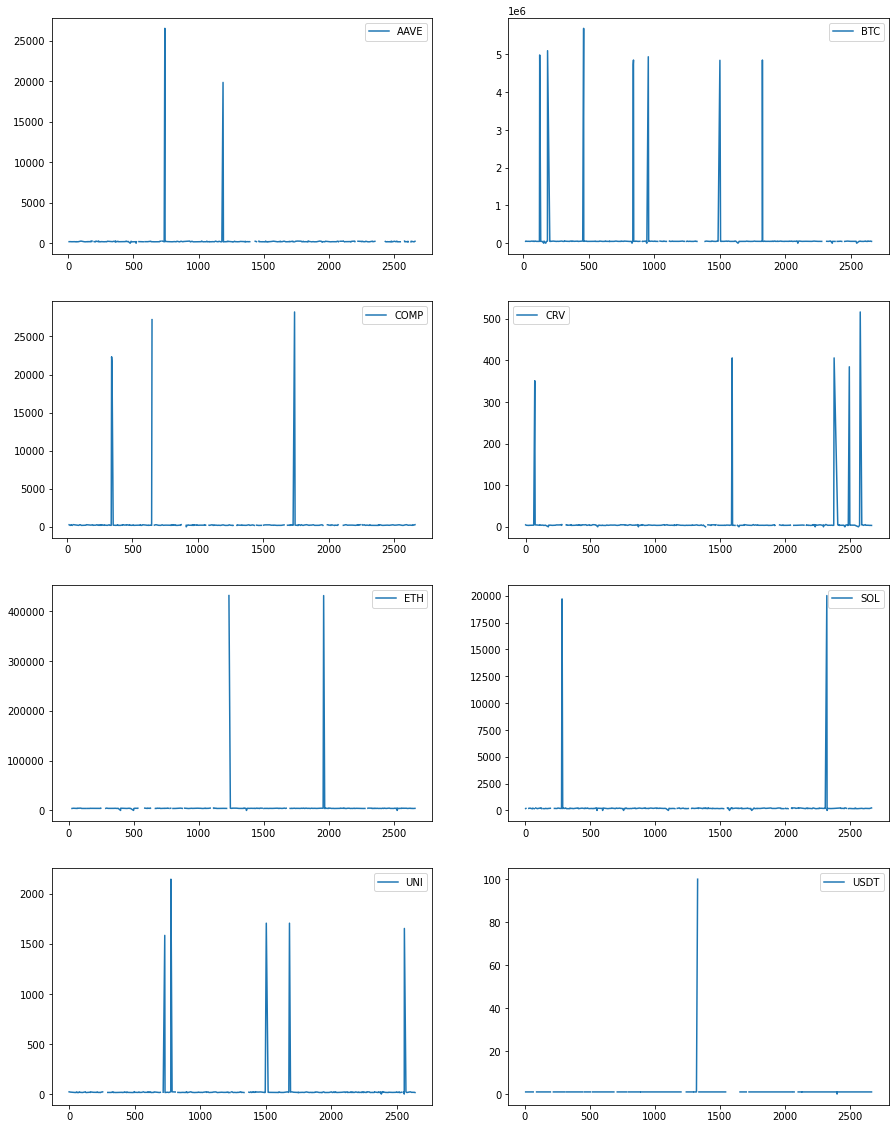

In [17]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

### Remove outliers from the number series by interpolating high and low

Too low of values: should be outlier value be 2x under, let that value get the difference of high and low

In [18]:
df.loc[df.close / df.open <= 2, 'close'] = 0.5 * (df.loc[df.close / df.open <= 2, 'high'] + df.loc[df.close / df.open <= 2, 'low'])

Too high of values: should the outlier be 2x higher, let that value get the difference of high and low.

In [19]:
df.loc[df.close / df.open >= 2, 'close'] = 0.5 * (df.loc[df.close / df.open >= 2, 'high'] + df.loc[df.close / df.open >= 2, 'low'])

#### Forward fill the close value

In [33]:
df['close'] = df['close'].fillna(method='ffill')
df['open'] = df['open'].fillna(method='ffill')
df['high'] = df['high'].fillna(method='ffill')
df['low'] = df['low'].fillna(method='ffill')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2667 entries, 0 to 2666
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ts         2667 non-null   object 
 1   open       2667 non-null   float64
 2   high       2667 non-null   float64
 3   low        2667 non-null   float64
 4   close      2667 non-null   float64
 5   volume     2667 non-null   float64
 6   volumeUSD  0 non-null      float64
 7   token      2667 non-null   object 
 8   chain      2667 non-null   object 
dtypes: float64(6), object(3)
memory usage: 208.4+ KB


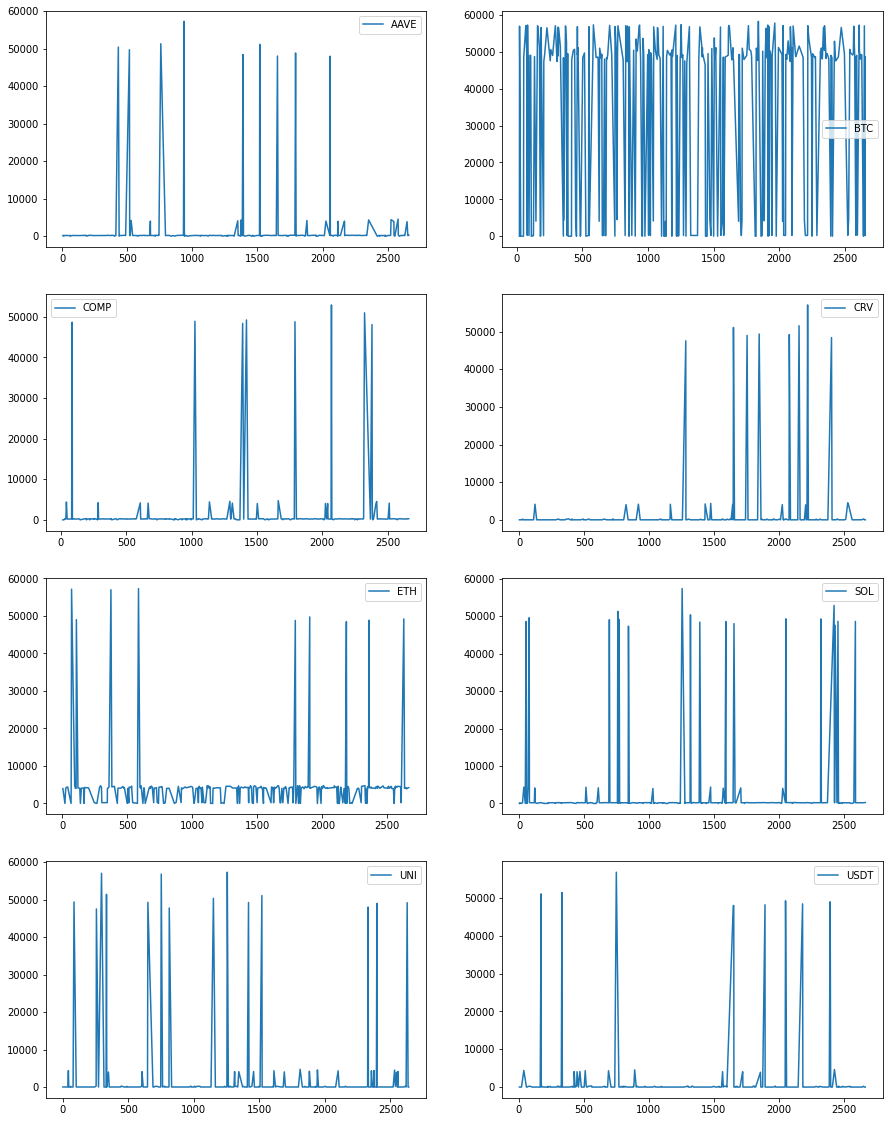

In [35]:
tokens_in_df = df.token.unique()

fig, axes = plt.subplots(nrows=math.ceil(tokens_in_df.size / 2), ncols=2, figsize=(15, 5 * math.ceil(tokens_in_df.size / 2)))

idx = 0
for label, df_token in df[['token', 'close']].groupby('token'):
    df_token['close'].plot(ax=axes[idx // 2, idx % 2], label=label)
    axes[idx // 2, idx % 2].legend()
    
    idx += 1

#### Calculate the volumeUSD = volume * close

In [36]:
df['volumeUSD']=df['volume'] * df['close']
df
df.groupby('chain').sum()

,open,high,low,close,volume,volumeUSD
chain,,,,,,
BTC,1.723602e+07,1.406226e+07,1.524629e+07,1.212213e+07,2.429154e+05,8.575895e+09
ETH,1.538677e+06,3.429653e+06,2.454807e+06,3.846085e+06,1.107322e+08,2.204860e+11
SOL,6.532295e+04,8.379397e+05,4.348490e+05,9.448312e+05,2.362087e+07,6.711956e+10
USDT,3.332975e+02,4.276012e+05,1.772216e+05,5.113805e+05,1.144022e+09,1.670648e+12
